In [31]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import copy
import torch as tr

# import scripts
from src.plotter import rosenbrock_plot

dtype = tr.float32

In [32]:
folder = "./data"; os.listdir(folder)

['20_bo.pt', '20_adam.pt', '20_es.pt']

In [34]:
index = -1

In [35]:
files = f"{os.listdir(folder)[index]}"

In [36]:
obj = tr.load(os.path.join(folder, files))

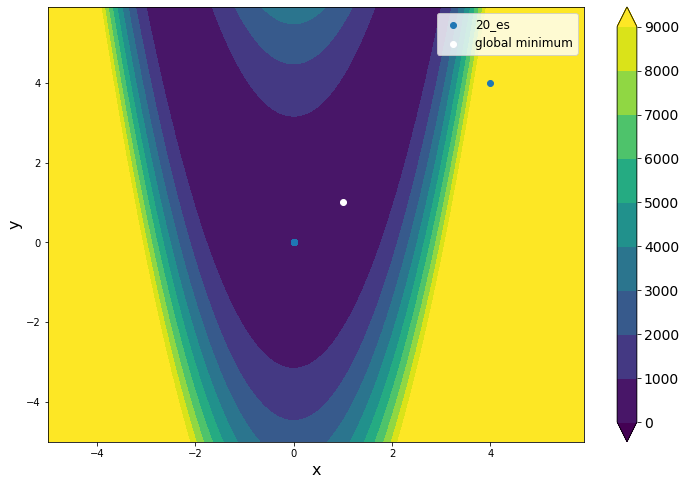

In [37]:
rosenbrock_plot.plot(np.arange(-5, 6,.1), np.arange(-5, 6,.1), [obj])